# A/B test and interpreating results

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
from scipy import stats

### Readind data

In [2]:
df = pd.read_csv('/Users/evgenijusolkin/Desktop/data_analyst/datasets/experiment.csv')

In [3]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [4]:
df.shape

(20196, 4)

In [7]:
#Is NaN values in our table
df.isna().sum()

order_id            0
delivery_time       0
district            0
experiment_group    0
dtype: int64

In [9]:
#is duplicated values in our table
df.duplicated().sum()

0

In [10]:
df.describe()

,order_id,delivery_time
count,20196.000000,20196.000000
mean,11103.503565,42.054169
std,5835.424404,10.382196
min,1000.000000,10.000000
25%,6048.750000,35.000000
50%,11109.500000,42.000000
75%,16158.250000,49.000000
max,21207.000000,83.000000


### Analysis

<AxesSubplot:xlabel='district', ylabel='count'>

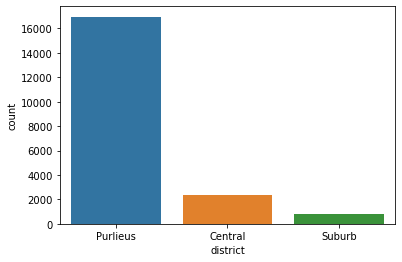

In [11]:
sns.countplot(x=df.district)

<AxesSubplot:>

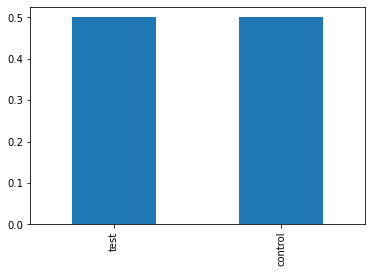

In [12]:
df.experiment_group.value_counts(normalize=True).plot.bar()

#### What is average delivery time in groups?

In [13]:
df.groupby('experiment_group').delivery_time.mean()

experiment_group
control    45.065101
test       39.046813
Name: delivery_time, dtype: float64

#### What is average delivery time by districts?

In [15]:
df.groupby('district').delivery_time.mean()

district
Central     25.063856
Purlieus    43.427182
Suburb      62.795238
Name: delivery_time, dtype: float64

In [16]:
control_group = df.query('experiment_group == "control"')
test_group = df.query('experiment_group == "test"')

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

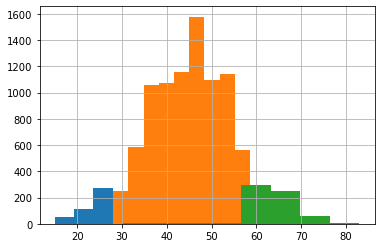

In [17]:
control_group.groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

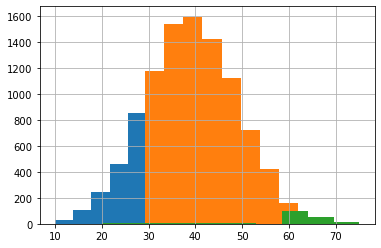

In [18]:
test_group.groupby('district').delivery_time.hist()

In [19]:
abs(control_group.shape[0] - test_group.shape[0])

12

### Analysis distributions

In [20]:
stats.shapiro(control_group.delivery_time.sample(1000, random_state=17))

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

In [21]:
stats.shapiro(test_group.delivery_time.sample(1000, random_state=17))

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. So, it's ok

In [22]:
control_group.delivery_time.std()

9.990016960247171

In [23]:
test_group.delivery_time.std()

9.883308351129031

### T-test

In [24]:
stats.ttest_ind(control_group.delivery_time, test_group.delivery_time)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

Student's test showed that the groups are different, p-value is less than 0.05.

In [25]:
round((test_group.delivery_time.mean() / control_group.delivery_time.mean() - 1) * 100 ,2)

-13.35

Delivery time has been reduced by 13 percent